In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np
import pandas as pd
import seaborn as sns
import re
sns.set()
from datetime import datetime 
from dateutil import parser
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
import seaborn; 
seaborn.set()


두 csv 파일을 병합하십시오! 탐색 데이터 분석을 수행하십시오. (모두 및 기타 설명 사용)
함수(예: 페어 플롯, 열 지도 등) 병합된 데이터 집합에 대해 간략하게 설명하십시오.

In [2]:
dataw=pd.read_csv('C:/Users/82106/Desktop/2020-2학기/데싸/winequality-white.csv', sep=';')

In [3]:
dataw

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [4]:
datar=pd.read_csv('C:/Users/82106/Desktop/2020-2학기/데싸/winequality-red.csv',sep=';')

In [5]:
datar

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
dataw['type']=('white')

In [7]:
datar['type']=('red')

In [8]:
data=pd.concat([dataw,datar])
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


2) 백포도주와 적포도주의 알코올 농도가 다르다고 생각하십니까? t-검정을 사용한 데이터 시각화 및 통계 분석으로 설명하십시오!

In [9]:
w=data.loc[data['type'] == 'white']
w

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [10]:
r=data.loc[data['type'] == 'red']
r

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


### W

In [11]:
#Load the library for Statistical testing
from scipy.stats import ttest_ind
#df, ttest,pval = sm.stats.ttest_ind(data['newspaper'],data['radio'])
ttest,pval = ttest_ind(w['alcohol'],r['alcohol']) # 신문이랑 라디오 
print("ttest", ttest)
print("p-value",pval)

if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we fail to reject (accept) null hypothesis")

ttest 2.6585128987466375
p-value 0.007867873993342453
we reject null hypothesis


In [12]:
#an alternative way to do the two sample t-test
import statsmodels.api as sm
sm.stats.ttest_ind(w['alcohol'],r['alcohol'])
#the last value is the degree of freedom

(2.6585128987466375, 0.007867873993342453, 6495.0)

데이터셋을 80%(교육용)와 20%(테스트용)로 나누십시오. 회귀 트리를 만드십시오! 와인 품질을 예측할 수 있는 좋은 모델을 만들어 주시겠습니까?

In [13]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [14]:
# select feature columns (every column except for the 0th column)
feature_cols = data.columns[0:11]

# define X (features) and y (response)
X = data[feature_cols]
y = data.quality

In [15]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [16]:
# split into train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

In [17]:
# print out each of the arrays
print(X_train) # 80%

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4152            6.2              0.20         0.25            15.0      0.055   
931             6.4              0.26         0.43            12.6      0.033   
4252            6.7              0.11         0.26            14.8      0.053   
1743            8.3              0.30         0.36            10.0      0.042   
1238            7.1              0.44         0.37             2.7      0.041   
...             ...               ...          ...             ...        ...   
905             8.4              0.19         0.42             1.6      0.047   
294            13.3              0.34         0.52             3.2      0.094   
3980            6.1              0.22         0.25            12.1      0.035   
235             7.2              0.23         0.38            14.3      0.058   
259            10.0              0.31         0.47             2.6      0.085   

      free sulfur dioxide  

In [18]:
print(y_train) # 20%

4152    6
931     5
4252    6
1743    6
1238    7
       ..
905     4
294     6
3980    5
235     6
259     7
Name: quality, Length: 5197, dtype: int64


In [19]:
# import class, instantiate estimator, fit with training set
# the first 10 random data
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)
treereg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [20]:
# the remaining 4 random data for testing 
# make predictions
preds = treereg.predict(X_test)
# x test를 가지고 예측

# print predictions and actual values
print(preds)
print(y_test)

[6. 7. 5. ... 6. 6. 7.]
3772    6
1111    7
3464    5
1518    6
3761    7
       ..
3276    8
4414    7
846     5
779     8
2377    6
Name: quality, Length: 1300, dtype: int64


In [21]:
# print RMSE (Root Mean Squared Error)
from sklearn import metrics
import numpy as np
np.sqrt(metrics.mean_squared_error(y_test, preds)) # testing data & prediction data

0.8166535844059444

In [22]:
# use cross-validation to find best max_depth
from sklearn.model_selection import cross_val_score


In [23]:
# the score is obtained using cross-validation method (equals to 3) and the score method is neg_MSE
treereg = DecisionTreeRegressor(max_depth=2, random_state=1)
scores = cross_val_score(treereg, X, y, cv=3, scoring='neg_mean_squared_error') # RMSE 

# CROSS VALIDATION 3 
np.mean(np.sqrt(-scores)) # 결과가 -가 될거라서

0.7947742697536396

In [24]:

treereg = DecisionTreeRegressor(max_depth=3, random_state=1)
scores = cross_val_score(treereg, X, y, cv=3, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

0.7997646807156981

In [25]:
treereg = DecisionTreeRegressor(max_depth=4, random_state=1)
scores = cross_val_score(treereg, X, y, cv=3, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

0.8338720472495371

In [26]:
treereg = DecisionTreeRegressor(max_depth=5, random_state=1)
scores = cross_val_score(treereg, X, y, cv=3, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

0.9053736820964678

In [27]:
# max_depth=3 was best, so fit a tree using that parameter with ALL DATA
treereg = DecisionTreeRegressor(max_depth=2, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=1)

In [28]:
# compute the "Gini importance" of each feature: the (normalized) total reduction of MSE brought by that feature
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

,feature,importance
0,fixed acidity,0.000000
1,volatile acidity,0.186177
2,citric acid,0.000000
3,residual sugar,0.000000
4,chlorides,0.000000
5,free sulfur dioxide,0.000000
6,total sulfur dioxide,0.000000
7,density,0.000000
8,pH,0.000000
9,sulphates,0.000000


In [29]:
# create a Graphviz file
from sklearn.tree import export_graphviz
with open("07_vehicles.dot", 'w') as f: # w 는 write /  " " 파일을 쓸거다
    f = export_graphviz(treereg, out_file=f, feature_names=feature_cols)
    # f는 treereg는 위에 만든 model , export는 내보낸다  , 우리가 선택한 열을 feature로 사용한다.

# at the command line, run this to convert to PNG:
# dot -Tpng 07_vehicles.dot -o tree.png
# Alternatively, you can search on the browser "graphviz online"
# Afterward, open the file "07_vehicles.dot" in a Word software
# copy and paste the text into the browser for "graphviz online"

In [30]:
! dot -Tpng 07_vehicles.dot -o tree.png

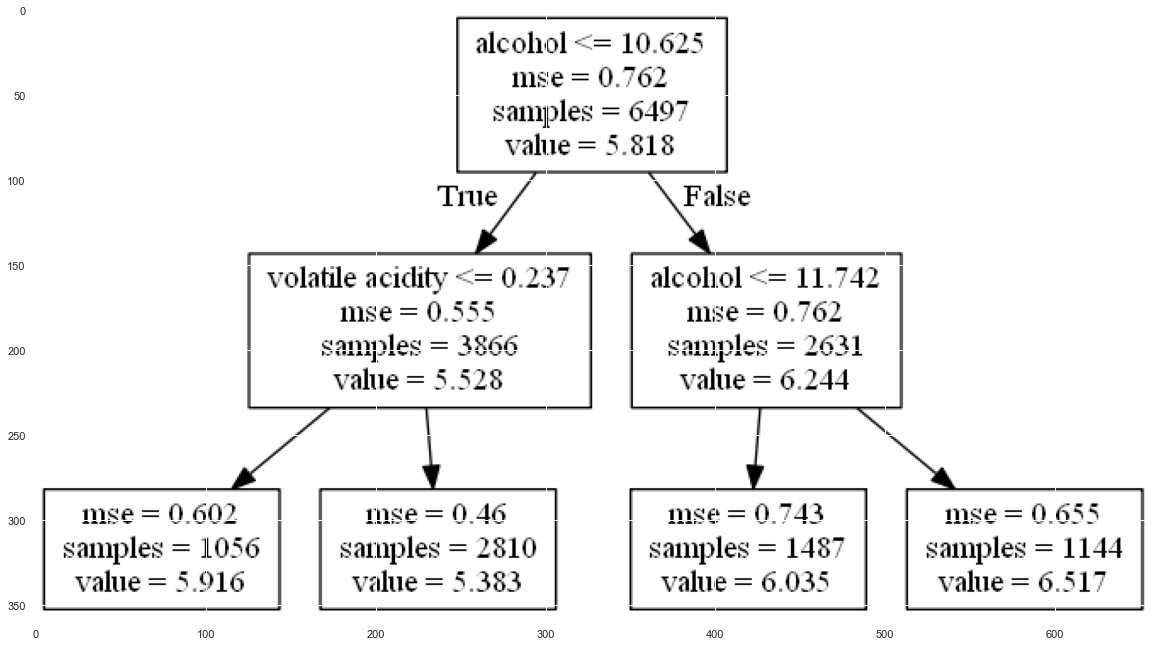

In [31]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png') # IMAGE를 읽고 싶다
plt.figure(figsize = (20, 20))
plt.imshow(img)

5보다 높거나 같은 품질을 "고품질"으로 분류하고 5보다 낮은 품질을 "중질"로 분류한다고 가정하자. 분류 트리를 만드세요!

In [32]:
nums = data['quality']
low_range =(nums < 5)
data.loc[low_range, 'quality'] = 'medium quality'
medium_range = (nums >= 5)
data.loc[medium_range, 'quality'] = 'high quality'


In [33]:
data['quality'].value_counts()

high quality      6251
medium quality     246
Name: quality, dtype: int64

In [34]:
data.loc[data['type'] == 'white', 'type'] = '1'
data.loc[data['type'] == 'red', 'type'] = '0'

In [35]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [36]:

feature_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol','type']

# define X and y
X = data[feature_cols]
y = data['quality']


In [37]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)
for i in range(1,11):
    treeclf2 = DecisionTreeClassifier(max_depth=i, random_state=1)
    treeclf2 = treeclf2.fit(X_train,y_train)
    y_pred = treeclf2.predict(X_test)

    print( "Accuracy when depth is",i ,metrics.accuracy_score(y_test, y_pred))

Accuracy when depth is 1 0.9666666666666667
Accuracy when depth is 2 0.9641025641025641
Accuracy when depth is 3 0.9635897435897436
Accuracy when depth is 4 0.9651282051282051
Accuracy when depth is 5 0.9641025641025641
Accuracy when depth is 6 0.9641025641025641
Accuracy when depth is 7 0.9635897435897436
Accuracy when depth is 8 0.9594871794871795
Accuracy when depth is 9 0.958974358974359
Accuracy when depth is 10 0.9579487179487179


In [38]:
# fit a classification tree with max_depth=3 on all data
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=4, random_state=1)
treeclf.fit(X, y)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [39]:
# create a Graphviz file
with open("07_titanic.dot", 'w') as f:
    f = export_graphviz(treeclf, out_file=f, feature_names=feature_cols)

In [40]:
! dot -Tpng 07_titanic.dot -o titanictree.png

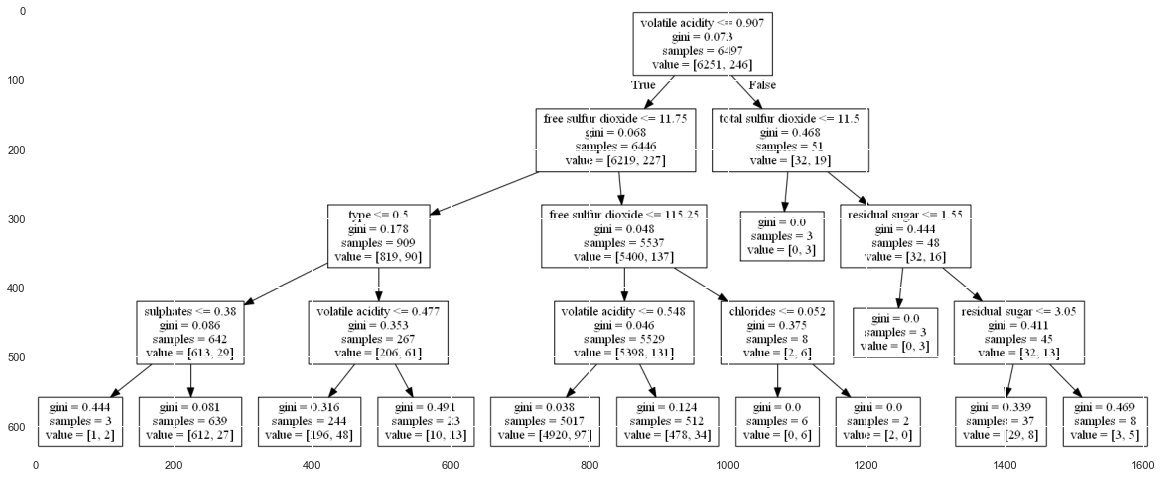

In [41]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('titanictree.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)

PCA를 사용하여 기능을 두 개의 구성 요소로 축소하십시오. k=2(고품질과 중질)로 한다. 축소된 데이터로 클러스터링을 수행하십시오! 정확도 점수 표시!

In [42]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,high quality,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,high quality,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,high quality,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,high quality,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,high quality,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,high quality,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,high quality,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,high quality,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,high quality,0


In [43]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [44]:
from sklearn.preprocessing import StandardScaler
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

# Separating out the features
x = data.loc[:, features].values
# Separating out the target
y = data.loc[:,['quality']].values


In [45]:
x

array([[ 7.   ,  0.27 ,  0.36 , ...,  3.   ,  0.45 ,  8.8  ],
       [ 6.3  ,  0.3  ,  0.34 , ...,  3.3  ,  0.49 ,  9.5  ],
       [ 8.1  ,  0.28 ,  0.4  , ...,  3.26 ,  0.44 , 10.1  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [46]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [48]:
principalDf

,principal component 1,principal component 2
0,2.778618,3.042330
1,-0.129793,-0.491683
2,0.194738,0.378754
3,1.807306,0.589593
4,1.807306,0.589593
...,...,...
6492,-2.194947,-0.541709
6493,-2.043117,-0.895009
6494,-2.274810,-0.423711
6495,-2.479566,-0.392779


In [49]:
dataq=data[['quality']].reset_index()
dataq

,index,quality
0,0,high quality
1,1,high quality
2,2,high quality
3,3,high quality
4,4,high quality
...,...,...
6492,1594,high quality
6493,1595,high quality
6494,1596,high quality
6495,1597,high quality


In [50]:
dataq.drop('index',axis=1 , inplace=True)

In [51]:
dataq

,quality
0,high quality
1,high quality
2,high quality
3,high quality
4,high quality
...,...
6492,high quality
6493,high quality
6494,high quality
6495,high quality


In [52]:
finalDf = pd.concat([principalDf, dataq[['quality']]], axis = 1)
finalDf

,principal component 1,principal component 2,quality
0,2.778618,3.042330,high quality
1,-0.129793,-0.491683,high quality
2,0.194738,0.378754,high quality
3,1.807306,0.589593,high quality
4,1.807306,0.589593,high quality
...,...,...,...
6492,-2.194947,-0.541709,high quality
6493,-2.043117,-0.895009,high quality
6494,-2.274810,-0.423711,high quality
6495,-2.479566,-0.392779,high quality


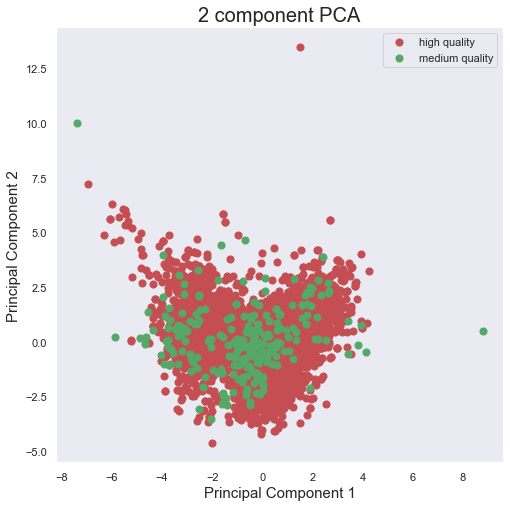

In [55]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['high quality','medium quality']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['quality'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [56]:
#The two components contain 0.27+ 0.23 = 0.50 (50%) of the information.
pca.explained_variance_ratio_

array([0.2754426 , 0.22671146])

In [57]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (6497, 12)
transformed shape: (6497, 2)


In [58]:
finalDf

,principal component 1,principal component 2,quality
0,2.778618,3.042330,high quality
1,-0.129793,-0.491683,high quality
2,0.194738,0.378754,high quality
3,1.807306,0.589593,high quality
4,1.807306,0.589593,high quality
...,...,...,...
6492,-2.194947,-0.541709,high quality
6493,-2.043117,-0.895009,high quality
6494,-2.274810,-0.423711,high quality
6495,-2.479566,-0.392779,high quality


In [62]:
finalDf['quality']=finalDf.quality.map({'high quality':1,'medium quality':0})

In [63]:

feature_cols = ['principal component 1', 'principal component 2']

# define X and y
X = finalDf[feature_cols]
y= finalDf['quality']


In [64]:
X=X.values

In [65]:
from sklearn.cluster import KMeans
est = KMeans(n_clusters=2, init='random') 
est.fit(X) 
y_kmeans = est.predict(X) 

In [66]:
est.fit_predict(X)
inertia = est.inertia_
inertia

20762.810547470996

C:\Users\82106\anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0, 0.5, '[-0.12979316 -0.49168276]')

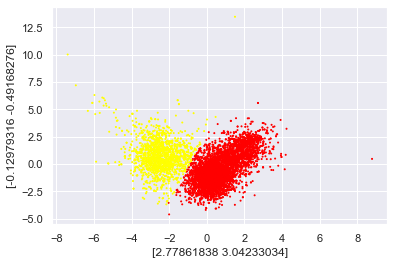

In [67]:
colors = np.array(['red','yellow','green']) 
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=colors[y_kmeans], s=1) 
plt.xlabel(X[0])
plt.ylabel(X[1])

In [68]:
# set k = 4 and fit the k-means algorithm to the data (X)
model = KMeans(2) # 4개의 CENTORID
model.fit(X) # X는 DATA POINT 

KMeans(n_clusters=2)

In [69]:
#print the cluster centers and the labels
print(model.cluster_centers_) # CENTROID 
print(model.labels_)

# Result from the clustering

[[ 0.85144317 -0.27076934]
 [-2.482991    0.78962151]]
[0 0 0 ... 1 1 1]


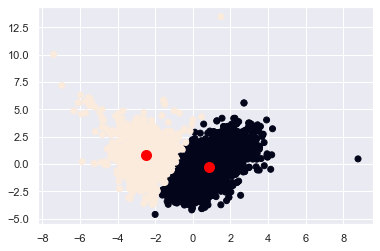

In [70]:
# plotting the 4 clusters with the center point (centroid)
plt.scatter(X[:,0],X[:,1], c=model.labels_);
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=100, color="red"); # Show the centres

In [71]:
y

0       1
1       1
2       1
3       1
4       1
       ..
6492    1
6493    1
6494    1
6495    1
6496    1
Name: quality, Length: 6497, dtype: int64

In [72]:
model.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [73]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y, model.labels_)
print("Accuracy score is", acc)

# 실제값과 예측값이 달라서 정확도가 낮음

Accuracy score is 0.26658457749730646


In [74]:
# check the results from the clustering
clusters = model.fit_predict(X)
clusters

array([0, 0, 0, ..., 1, 1, 1])

In [75]:
# Fix permuted labels
from scipy import stats
labels = np.zeros_like(clusters) #prepare an array with the same size of clusters and put the value 0
for i in range(2):
    mask = (clusters == i) #mask = TRUE if the clusters equal to the i
    labels[mask] = stats.mode(y[mask])[0] #choose the mode (the most common value) and put it on the label

In [76]:
print("Accuracy score is", accuracy_score(y, labels))

Accuracy score is 0.9621363706325997


PCA가 없으면 병합된 데이터 집합에서 클러스터링을 수행하십시오! 미터법(엘보우 방법과 실루엣 점수)에 따르면 가장 좋은 k는 무엇인가? 정확도 점수 표시!

In [77]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,high quality,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,high quality,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,high quality,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,high quality,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,high quality,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,high quality,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,high quality,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,high quality,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,high quality,0


In [78]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,high quality,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,high quality,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,high quality,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,high quality,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,high quality,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,high quality,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,high quality,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,high quality,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,high quality,0


In [79]:
from sklearn.cluster import KMeans

In [80]:

feature_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']

# define X and y
X = data[feature_cols]
y = data['quality']


In [81]:
X=X.values

In [82]:
X

array([[ 7.   ,  0.27 ,  0.36 , ...,  3.   ,  0.45 ,  8.8  ],
       [ 6.3  ,  0.3  ,  0.34 , ...,  3.3  ,  0.49 ,  9.5  ],
       [ 8.1  ,  0.28 ,  0.4  , ...,  3.26 ,  0.44 , 10.1  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [83]:
y

0       high quality
1       high quality
2       high quality
3       high quality
4       high quality
            ...     
1594    high quality
1595    high quality
1596    high quality
1597    high quality
1598    high quality
Name: quality, Length: 6497, dtype: object

In [84]:

seed = 0
elbow = dict()
for k in range(1,11): 
    estimator = KMeans(n_clusters = k,random_state=seed)
    res = estimator.fit_predict(X)
    inertia = estimator.inertia_
    elbow[k] = inertia


In [85]:
elbow 

{1: 22967249.049408793,
 2: 8589969.08292088,
 3: 4331609.7110936595,
 4: 3038985.3731661336,
 5: 2394365.6212613685,
 6: 2041472.4016074904,
 7: 1796468.412538381,
 8: 1623794.7543764291,
 9: 1482995.9346599192,
 10: 1377121.0521959974}

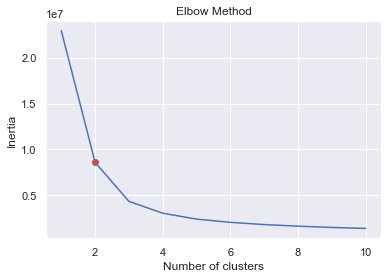

In [86]:
elbow_df = pd.Series(elbow)
ax = elbow_df.plot(title = 'Elbow Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia')
plt.plot(2,elbow_df[2],'ro')

In [87]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.5093659764370656
For n_clusters = 3 The average silhouette_score is : 0.5040451803366264
For n_clusters = 4 The average silhouette_score is : 0.450422979458827
For n_clusters = 5 The average silhouette_score is : 0.41830703580737244
For n_clusters = 6 The average silhouette_score is : 0.39093137405121503


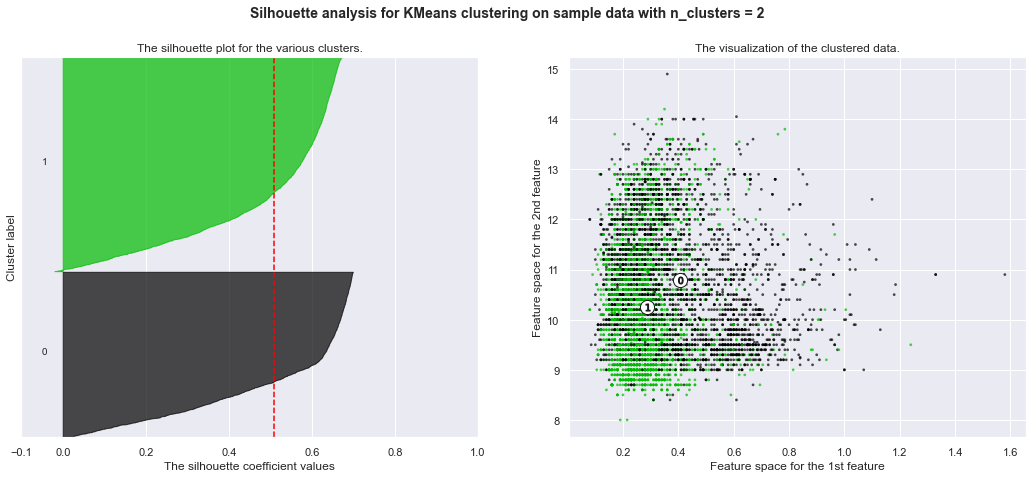

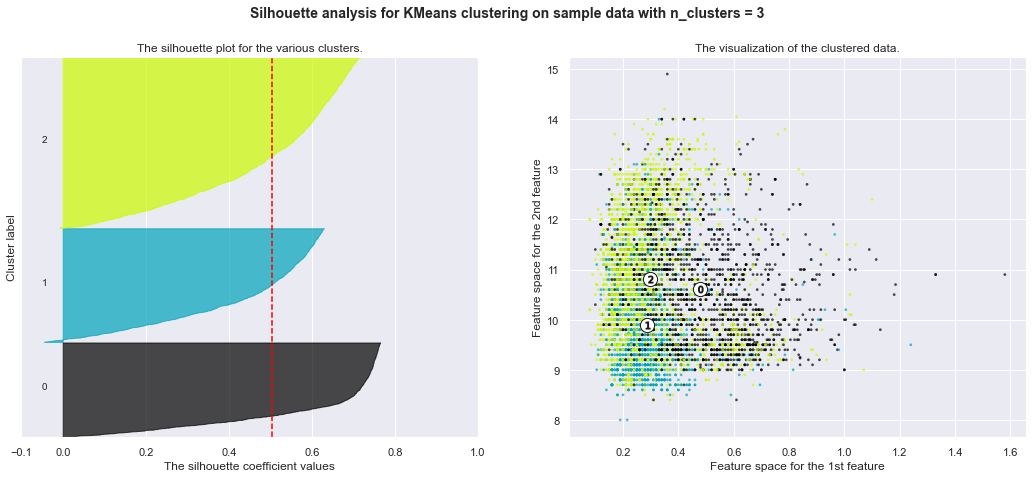

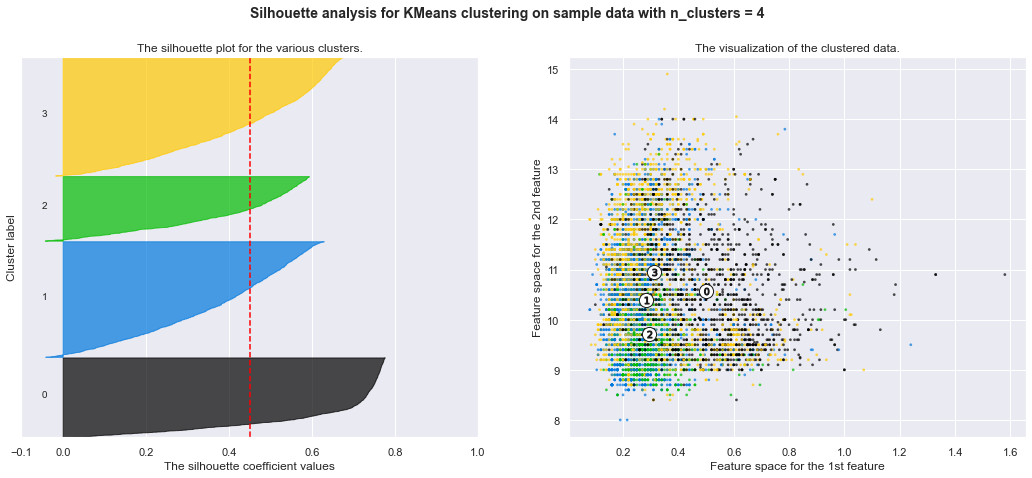

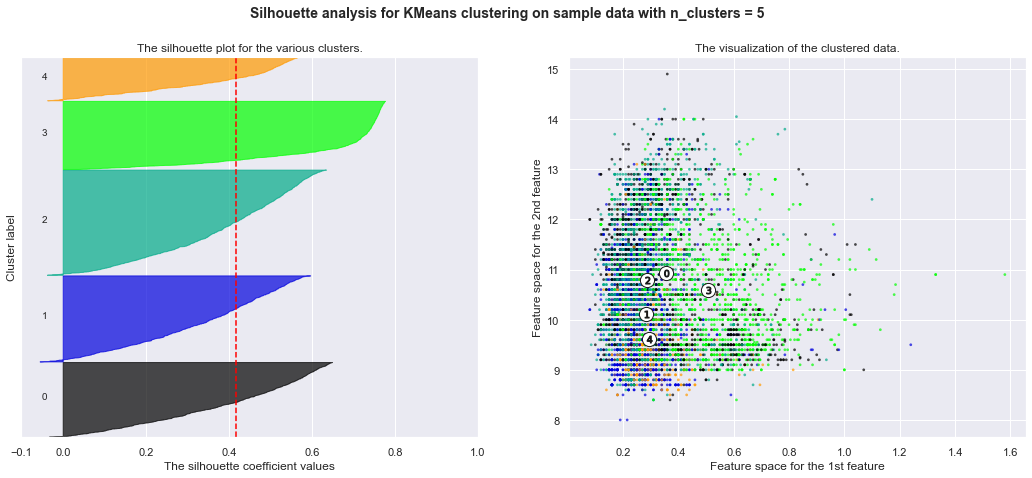

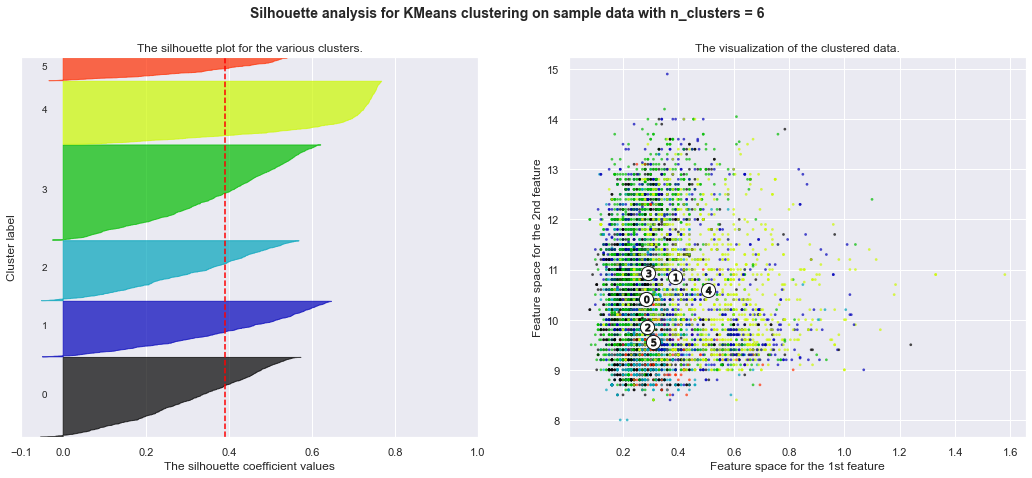

In [88]:
seed = 0
dict_silhouette_avg = dict()
range_n_clusters = range(2,7)

for n_clusters in range_n_clusters:
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])

    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])


    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    dict_silhouette_avg[n_clusters] = silhouette_avg


    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):

        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)


        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

     
        y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")


    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 1], X[:, 10], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    
    centers = clusterer.cluster_centers_
   
    ax2.scatter(centers[:,1], centers[:,10], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[1], c[10], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()



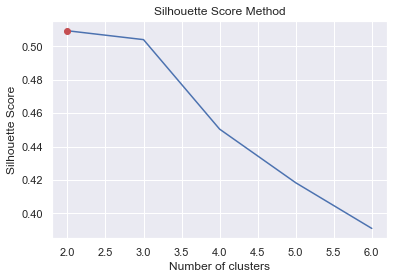

In [89]:
silhouette_df = pd.Series(dict_silhouette_avg)
ax = silhouette_df.plot(title = 'Silhouette Score Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette Score')
plt.plot(2,silhouette_df[2],'ro')



In [118]:
est = KMeans(n_clusters=6, init='random') 
est.fit(X) 
y_kmeans = est.predict(X) 

In [119]:
est.fit_predict(X)
inertia = est.inertia_
inertia

2041491.1291313134

In [120]:
X

array([[ 7.   ,  0.27 ,  0.36 , ...,  3.   ,  0.45 ,  8.8  ],
       [ 6.3  ,  0.3  ,  0.34 , ...,  3.3  ,  0.49 ,  9.5  ],
       [ 8.1  ,  0.28 ,  0.4  , ...,  3.26 ,  0.44 , 10.1  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

Text(0, 0.5, '[7.000e+00 2.700e-01 3.600e-01 2.070e+01 4.500e-02 4.500e+01 1.700e+02\n 1.001e+00 3.000e+00 4.500e-01 8.800e+00]')

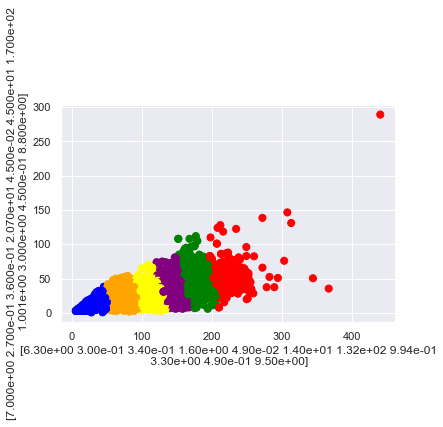

In [144]:
colors = np.array(['red','yellow','green','blue','orange','purple']) 
plt.figure()
plt.scatter(X[:, 6], X[:, 5], c=colors[y_kmeans], s=50) 
plt.xlabel(X[1])
plt.ylabel(X[0])

In [446]:
print(y) # actual value from the random

0       6
1       6
2       6
3       6
4       6
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 6497, dtype: int64


In [447]:
# set k = 4 and fit the k-means algorithm to the data (X)
model = KMeans(2) # 4개의 CENTORID
model.fit(X) # X는 DATA POINT 

KMeans(n_clusters=2)

In [448]:
#print the cluster centers and the labels
print(model.cluster_centers_) # CENTROID 
print(model.labels_)

# Result from the clustering

[[6.90558133e+00 2.87138373e-01 3.39639738e-01 7.26899563e+00
  4.86132642e-02 3.98500273e+01 1.56000955e+02 9.94802576e-01
  3.19025928e+00 5.00109170e-01 1.02559898e+01]
 [7.61588422e+00 4.07601483e-01 2.91464878e-01 3.08192729e+00
  6.56311331e-02 1.84654077e+01 6.36798447e+01 9.94559615e-01
  3.25502647e+00 5.71567243e-01 1.07967820e+01]]
[0 0 1 ... 1 1 1]


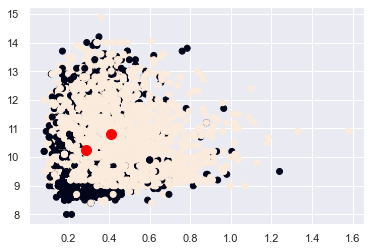

In [449]:
# plotting the 4 clusters with the center point (centroid)
plt.scatter(X[:,1],X[:,10], c=model.labels_);
plt.scatter(model.cluster_centers_[:,1], model.cluster_centers_[:,10], s=100, color="red"); # Show the centres

In [450]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y, model.labels_)
print("Accuracy score is", acc)

# 실제값과 예측값이 달라서 정확도가 낮음

Accuracy score is 0.0


In [451]:
print(y) 

0       6
1       6
2       6
3       6
4       6
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 6497, dtype: int64


In [452]:
print(model.labels_)

[0 0 1 ... 1 1 1]


In [453]:
# check the results from the clustering
clusters = model.fit_predict(X)
clusters

array([0, 0, 1, ..., 1, 1, 1])

In [454]:
# Fix permuted labels
from scipy import stats
labels = np.zeros_like(clusters) #prepare an array with the same size of clusters and put the value 0
for i in range(10):
    mask = (clusters == i) #mask = TRUE if the clusters equal to the i
    labels[mask] = stats.mode(y[mask])[0] #choose the mode (the most common value) and put it on the label

In [455]:
labels

array([6, 6, 6, ..., 6, 6, 6])

In [456]:
print("Accuracy score is", accuracy_score(y, labels))

Accuracy score is 0.43650915807295676
